In [81]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

In [82]:
# load the dataset

nobel_df = pd.read_csv(r'C:\Users\Joseph\OneDrive\Documents\Personal Projects\Nobel_Prize\data\archive.csv')

In [83]:
# let's take a look at the first few rows

nobel_df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France


Just looking at the first couple of prize winners, all of the winners in 1901 were guys that came from Europe. 

### So, who gets the Nobel Prize?

But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?

* For country, I'll use the birth_country of the winner as the organization_country is NaN for all shared Nobel Prizes.

In [84]:
# Display the number of (possibly shared) Nobel Prizes handed out between 1901 and 2016
display(len(nobel_df))

# Display the number of prizes won by male and female recipients.
display(nobel_df['Sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel_df['Birth Country'].value_counts().head(10)

969

Male      893
Female     50
Name: Sex, dtype: int64

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. 

### USA dominance

When did the USA start to dominate the Nobel Prize charts?

In [85]:
# Calculating the proportion of USA born winners per decade
nobel_df['usa_born_winner'] = nobel_df['Birth Country'] == 'United States of America'
nobel_df['decade'] = (np.floor(nobel_df['Year'] / 10) * 10).astype(int)
prop_usa_winners = nobel_df.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


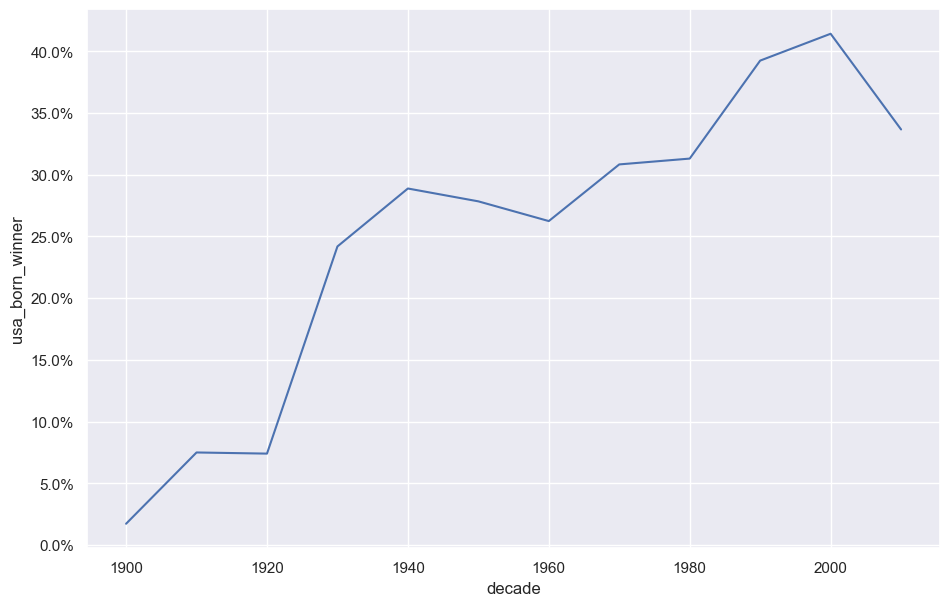

In [86]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

### What is the gender of a typical Nobel Prize winner?

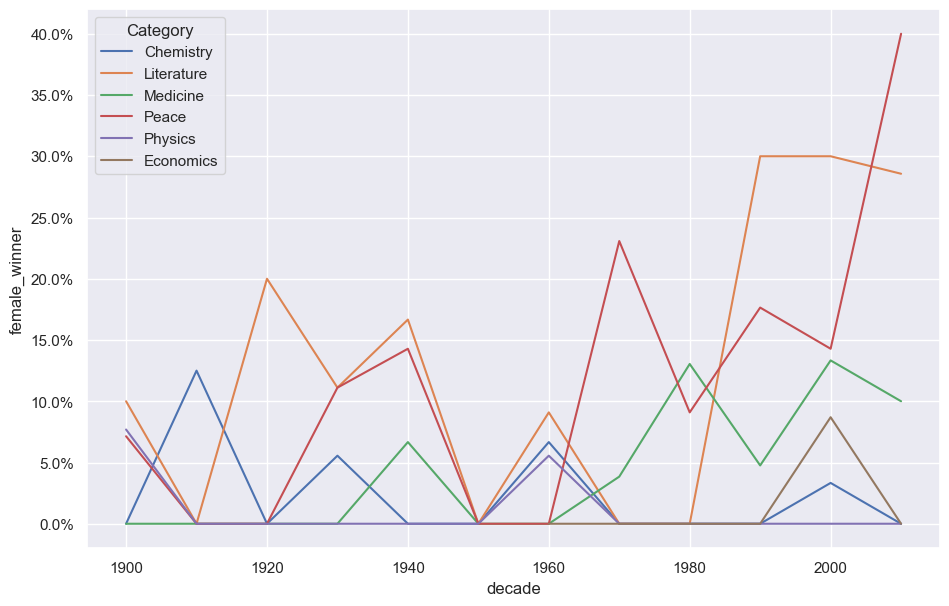

In [87]:
# Calculating the proportion of female laureates per decade
nobel_df['female_winner'] = nobel_df['Sex'] == 'Female'
prop_female_winners = nobel_df.groupby(['decade', 'Category'], as_index=False)['female_winner'].mean()

# Plotting female winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.

### The first woman to win the Nobel Prize

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [88]:
# Picking out the first woman to win a Nobel Prize
nobel_df[nobel_df.Sex == 'Female'].nsmallest(1, 'Year')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",4-Jan,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,7/4/1934,Sallanches,France,False,1900,True


### Repeat laureates

In [89]:
# Selecting the laureates that have received 2 or more prizes.
nobel_df.groupby('Full Name').filter(lambda group: len(group) >= 2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",4-Jan,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,7/4/1934,Sallanches,France,False,1900,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",2-Jan,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Goettingen University,Göttingen,Germany,8/20/1915,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",2-Jan,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,8/20/1915,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1-Jan,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,7/4/1934,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1-Jan,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",3-Jan,906,Individual,Isamu Akasaki,1/30/1929,Chiran,...,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,False,2010,False
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",3-Jan,921,Individual,Tomas Lindahl,1/28/1938,Stockholm,...,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",3-Jan,921,Individual,Tomas Lindahl,1/28/1938,Stockholm,...,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",3-Jan,922,Individual,Paul Modrich,6/13/1946,"Raton, NM",...,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,True,2010,False


The list of repeat winners contains some illustrious names. Marie Curie got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament.

### How old are you when you get the prize?

But how old are you generally when you get the prize?

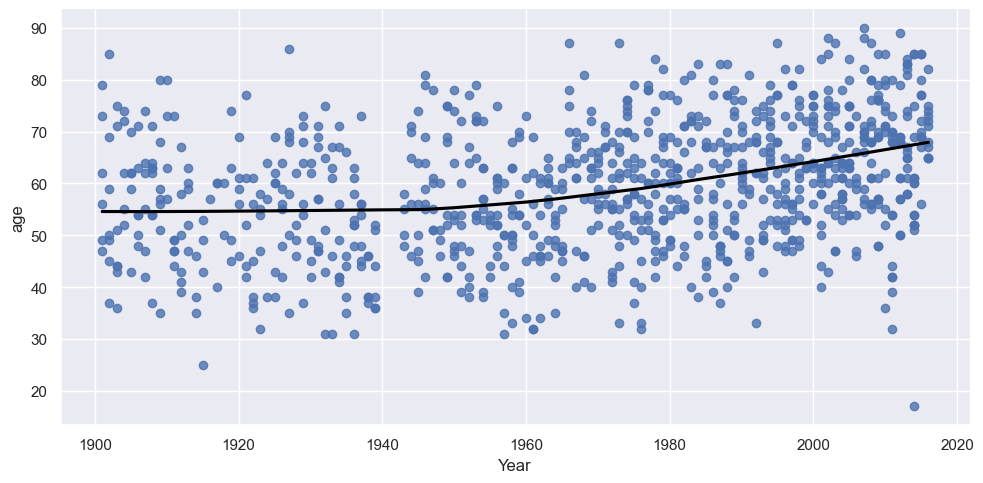

In [91]:
# Converting birth_date from String to datetime
nobel_df['Birth Date'] = pd.to_datetime(nobel_df['Birth Date'], errors='coerce')

# Calculating the age of Nobel Prize winners
nobel_df['age'] = nobel_df['Year'] - nobel_df['Birth Date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='Year', y='age', data=nobel_df, lowess=True, aspect=2, line_kws={'color': 'black'})

The plot above shows a lot. Laureates used to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

Also, the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. Furthermore, there was a disruption in awarded prizes around the Second World War (1939 - 1945).

### Age differences between prize categories

Let's look at age trends within different prize categories.

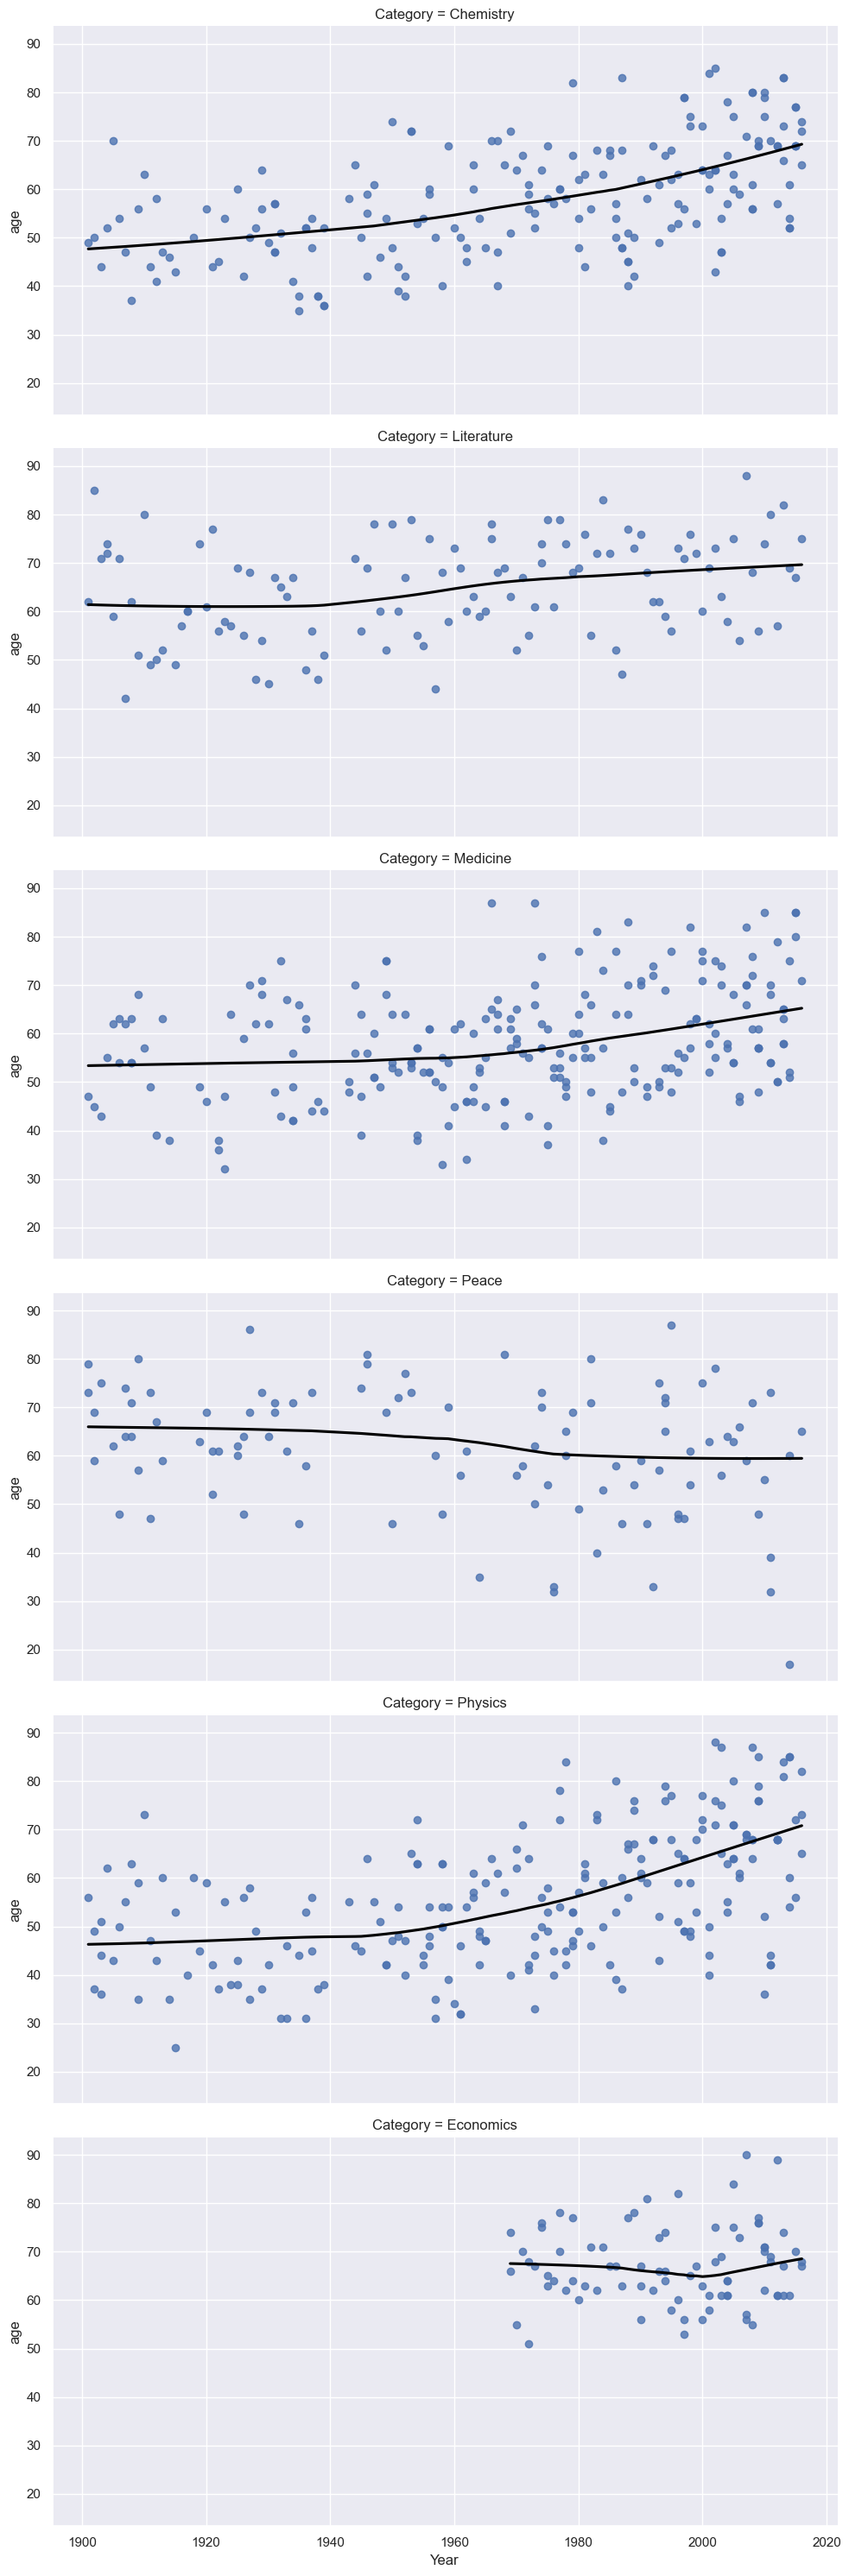

In [93]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='Year', y='age', row='Category', data=nobel_df, lowess=True, 
           aspect=2, line_kws={'color' : 'black'})

Both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. It's obvious that economics is a newer category. But peace shows an opposite trend where winners are getting younger.

### Oldest and youngest winners

In [94]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel_df.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
nobel_df.nsmallest(1, 'age')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",3-Jan,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,6/24/2008,"Minneapolis, MN",United States of America,False,2000,False,90.0


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",2-Jan,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
